<a href="https://colab.research.google.com/github/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/blob/aula-5/Regresion_construyendo_arboles_de_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión: Construyendo Árboles de Regresión**

## **Precificación en la entrega de esculturas**

![](https://github.com/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/blob/main/img/comparacion_3.png?raw=true)

# **Clase 1 - Trabajando con los datos**

In [1]:
url = 'https://raw.githubusercontent.com/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/refs/heads/main/entregas.csv'

url_prueba = 'https://raw.githubusercontent.com/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/refs/heads/main/prueba_entregas.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
datos = pd.read_csv(url)
datos.head()

,id_cliente,nombre_artista,reputacion_artista,altura,ancho,peso,material,precio_escultura,precio_base_envio,internacional,envio_expreso,instalacion_incluida,transporte,fragil,pedido_extra_cliente,localizacion_remota,fecha_programada,fecha_entrega,costo
0,e9dff114-bc2b-47e9-9f5c-669e32ad9bbe,Billy Jenkins,0.26,5.1816,1.8288,1872.427776,Latón,73027.5,85.4175,Sí,Sí,No,Aéreo,No,Sí,No,07/06/19,03/06/19,1487.2725
1,ba3b707f-b123-4eec-93f4-1fbebfe72b68,Jean Bryant,0.28,0.9144,0.9144,27.669112,Latón,35857.5,78.7500,No,No,No,Terrestre,No,Sí,No,06/03/21,05/03/21,839.7900
2,c4212086-3e22-489e-bc2e-0d5092ef0526,Laura Miller,0.07,2.4384,1.5240,107.501304,Arcilla,26040.0,111.1950,No,No,No,Terrestre,Sí,Sí,Sí,09/03/19,08/03/19,810.0225
3,fec1bee9-44cf-498f-a849-5e5e2cab062b,Robert Chaires,0.12,2.7432,2.4384,1407.042384,Aluminio,30502.5,85.6275,No,No,No,No especificado,No,No,Sí,24/05/19,20/05/19,846.0900
4,f9f2ed8c-7f56-4e69-a80e-cb01d0a711da,Rosalyn Krol,0.15,5.1816,1.8288,146.963808,Aluminio,16695.0,62.6850,Sí,Sí,Sí,Aéreo,No,Sí,No,18/12/20,14/12/20,835.9575


Diccionario de datos:

| Nombre de la Columna     | Descripción                                                                 |
|--------------------------|------------------------------------------------------------------------------|
| id_cliente               | Representa el número de identificación único de los clientes                |
| nombre_artista           | Representa el nombre del artista                                            |
| reputacion_artista       | Representa la reputación de un artista en el mercado (cuanto mayor es el valor de la reputación, mayor es la reputación del artista en el mercado) |
| altura                   | Representa la altura de la escultura en metros                              |
| ancho                  | Representa la anchura de la escultura en metros                             |
| peso                     | Representa el peso de la escultura en kilogramos                            |
| material                 | Representa el material del que está hecha la escultura                      |
| precio_escultura         | Representa el precio de la escultura                                         |
| precio_base_envio        | Representa el precio base para el envío de una escultura                    |
| internacional            | Indica si el envío es internacional                                          |
| envio_expreso            | Indica si el envío fue en modalidad exprés (rápido)                         |
| instalacion_incluida     | Indica si la instalación estaba incluida en la compra de la escultura       |
| transporte               | Representa el modo de transporte del pedido                                  |
| fragil                   | Indica si el pedido es frágil                                                |
| pedido_extra_cliente     | Representa si el cliente dejó detalles adicionales para la entrega          |
| fecha_programada         | Representa la fecha prevista de entrega                                     |
| fecha_entrega            | Representa la fecha de entrega del pedido                                    |
| costo                    | Representa el costo del envío del pedido                                     |


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            4462 non-null   object 
 1   nombre_artista        4462 non-null   object 
 2   reputacion_artista    4462 non-null   float64
 3   altura                4462 non-null   float64
 4   ancho                 4462 non-null   float64
 5   peso                  4462 non-null   float64
 6   material              4462 non-null   object 
 7   precio_escultura      4462 non-null   float64
 8   precio_base_envio     4462 non-null   float64
 9   internacional         4462 non-null   object 
 10  envio_expreso         4462 non-null   object 
 11  instalacion_incluida  4462 non-null   object 
 12  transporte            4462 non-null   object 
 13  fragil                4462 non-null   object 
 14  pedido_extra_cliente  4462 non-null   object 
 15  localizacion_remota  

**ENTENDIENDO LAS COLUMNAS**

**Dato numérico:**
- `'reputacion_artista'`, `'altura'`, `'ancho'`, `'peso'`, `'precio_escultura'`, `'precio_base_envio'`.

**Categóricas:**

- `'id_cliente'`, `'nombre_artista'`, `'material'`, `'internacional'`, `'envio_expreso'`, `'instalacion_incluida'`, `'transporte'`, `'fragil'`, `'pedido_extra_cliente'`, `localizacion_remota`.

**Fechas:**

- `'fecha_programada'`, `'fecha_entrega'`.

**Target:**
- `'costo'`.

In [5]:
df = datos.copy()

In [6]:
df['fecha_programada'] = pd.to_datetime(df['fecha_programada'],format='%d/%m/%y')
df['fecha_entrega'] = pd.to_datetime(df['fecha_entrega'],format='%d/%m/%y')

In [7]:
df['diferencia_dias_entrega'] = (df['fecha_entrega'] - df['fecha_programada']).dt.days

In [8]:
df['fecha_programada_dias'] = df['fecha_programada'].dt.day
df['fecha_programada_mes'] = df['fecha_programada'].dt.month
df['fecha_programada_ano'] = df['fecha_programada'].dt.year

In [9]:
df['fecha_entrega_dias'] = df['fecha_entrega'].dt.day
df['fecha_entrega_mes'] = df['fecha_entrega'].dt.month
df['fecha_entrega_ano'] = df['fecha_entrega'].dt.year

In [10]:
df.drop(['fecha_entrega','fecha_programada'],axis= 1, inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               4462 non-null   object 
 1   nombre_artista           4462 non-null   object 
 2   reputacion_artista       4462 non-null   float64
 3   altura                   4462 non-null   float64
 4   ancho                    4462 non-null   float64
 5   peso                     4462 non-null   float64
 6   material                 4462 non-null   object 
 7   precio_escultura         4462 non-null   float64
 8   precio_base_envio        4462 non-null   float64
 9   internacional            4462 non-null   object 
 10  envio_expreso            4462 non-null   object 
 11  instalacion_incluida     4462 non-null   object 
 12  transporte               4462 non-null   object 
 13  fragil                   4462 non-null   object 
 14  pedido_extra_cliente    

In [12]:
columnas_categoricas = ['id_cliente', 'nombre_artista', 'material', 'internacional', 'envio_expreso', 'instalacion_incluida',
                       'transporte', 'fragil', 'pedido_extra_cliente','localizacion_remota']

for columna in columnas_categoricas:
    unique_values = df[columna].unique()
    print(f"Valores únicos en la columna '{columna}' \n {len(unique_values)} valores:")
    print(unique_values)
    print('=='*45)

Valores únicos en la columna 'id_cliente' 
 4462 valores:
['e9dff114-bc2b-47e9-9f5c-669e32ad9bbe'
 'ba3b707f-b123-4eec-93f4-1fbebfe72b68'
 'c4212086-3e22-489e-bc2e-0d5092ef0526' ...
 'e1004685-9047-4f34-9103-57d900716936'
 'a380ff88-2c96-4d70-919a-af0bc8caeed7'
 '26fea648-9cc1-4a2b-9458-0b2d35957803']
Valores únicos en la columna 'nombre_artista' 
 4441 valores:
['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'William Curry'
 'Karen Bayles' 'Denise Worth']
Valores únicos en la columna 'material' 
 8 valores:
['Latón' 'Arcilla' 'Aluminio' 'Madera' 'Bronce' 'Piedra' 'No especificado'
 'Mármol']
Valores únicos en la columna 'internacional' 
 2 valores:
['Sí' 'No']
Valores únicos en la columna 'envio_expreso' 
 2 valores:
['Sí' 'No']
Valores únicos en la columna 'instalacion_incluida' 
 2 valores:
['No' 'Sí']
Valores únicos en la columna 'transporte' 
 4 valores:
['Aéreo' 'Terrestre' 'No especificado' 'Acuático']
Valores únicos en la columna 'fragil' 
 2 valores:
['No' 'Sí']
Valores únic

**ENTENDIENDO LAS COLUMNAS TEXTUALES**

**Categóricas:**

- *Valores binários*: `'internacional'`, `'envio_expreso'`, `'instalacion_incluida'`,  `'fragil'`, `'pedido_extra_cliente'`, `'localizacion_remota'`.
- *Várias Categorias*:`'material'`, `'transporte'`
- *Valores únicos*: `'id_cliente'`, `'nombre_artista'`

In [13]:
categoricas = ['material', 'internacional', 'envio_expreso', 'instalacion_incluida',
              'transporte', 'fragil', 'pedido_extra_cliente','localizacion_remota']

df = pd.get_dummies(df , columns = categoricas, prefix = categoricas, drop_first=True)

In [14]:
df.drop(['id_cliente', 'nombre_artista'],axis= 1, inplace=True)

In [15]:
df

,reputacion_artista,altura,ancho,peso,precio_escultura,precio_base_envio,costo,diferencia_dias_entrega,fecha_programada_dias,fecha_programada_mes,...,material_Piedra,internacional_Sí,envio_expreso_Sí,instalacion_incluida_Sí,transporte_Aéreo,transporte_No especificado,transporte_Terrestre,fragil_Sí,pedido_extra_cliente_Sí,localizacion_remota_Sí
0,0.26000,5.1816,1.8288,1872.427776,73027.5,85.4175,1487.2725,-4,7,6,...,False,True,True,False,True,False,False,False,True,False
1,0.28000,0.9144,0.9144,27.669112,35857.5,78.7500,839.7900,-1,6,3,...,False,False,False,False,False,False,True,False,True,False
2,0.07000,2.4384,1.5240,107.501304,26040.0,111.1950,810.0225,-1,9,3,...,False,False,False,False,False,False,True,True,True,True
3,0.12000,2.7432,2.4384,1407.042384,30502.5,85.6275,846.0900,-4,24,5,...,False,False,False,False,False,True,False,False,False,True
4,0.15000,5.1816,1.8288,146.963808,16695.0,62.6850,835.9575,-4,18,12,...,False,True,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,0.93000,6.0960,2.4384,294.381208,25462.5,130.0950,3923.9550,4,23,3,...,False,True,False,True,False,False,False,False,True,False
4458,0.67000,3.9624,2.4384,215.456200,19162.5,67.8825,1546.7550,-1,28,10,...,False,True,False,True,False,False,True,False,True,False
4459,0.46185,3.9624,2.4384,69.853168,27982.5,68.2500,916.4925,0,16,3,...,False,False,True,False,True,False,False,False,False,False
4460,0.45000,6.0960,8.5344,4921.926792,161857.5,355.4250,5653.4625,2,19,4,...,False,False,False,True,False,False,True,False,True,False


# Clase 2 - Construyendo el Árbol de Regresión

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('costo',axis=1)
y = df['costo']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [17]:
len(X_test),len(X_train)

(893, 3569)

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=45)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=45)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Métricas conjunto de entrenamiento')
print('R²: ', r2_score(y_train, dtr.predict(X_train)))
print('MAE: ', mean_absolute_error(y_train, dtr.predict(X_train)))
print('RMSE: ', mean_squared_error(y_train, dtr.predict(X_train))**0.5)

print('\n\nMétricas conjunto de prueba')
print('R²: ', r2_score(y_test, dtr.predict(X_test)))
print('MAE: ', mean_absolute_error(y_test, dtr.predict(X_test)))
print('RMSE: ', mean_squared_error(y_test, dtr.predict(X_test))**0.5)

Métricas conjunto de entrenamiento
R²:  1.0
MAE:  0.0
RMSE:  0.0


Métricas conjunto de prueba
R²:  0.6768224276483932
MAE:  682.6879535274356
RMSE:  1507.2656329983245


In [20]:
print(f'Número de nodos: {dtr.tree_.node_count}')
print(f'Número de hojas: {dtr.tree_.n_leaves}')
print(f'Profundidad máxima: {dtr.tree_.max_depth}')

Número de nodos: 7135
Número de hojas: 3568
Profundidad máxima: 30


In [21]:
dtr.feature_names_in_

array(['reputacion_artista', 'altura', 'ancho', 'peso',
       'precio_escultura', 'precio_base_envio', 'diferencia_dias_entrega',
       'fecha_programada_dias', 'fecha_programada_mes',
       'fecha_programada_ano', 'fecha_entrega_dias', 'fecha_entrega_mes',
       'fecha_entrega_ano', 'material_Arcilla', 'material_Bronce',
       'material_Latón', 'material_Madera', 'material_Mármol',
       'material_No especificado', 'material_Piedra', 'internacional_Sí',
       'envio_expreso_Sí', 'instalacion_incluida_Sí', 'transporte_Aéreo',
       'transporte_No especificado', 'transporte_Terrestre', 'fragil_Sí',
       'pedido_extra_cliente_Sí', 'localizacion_remota_Sí'], dtype=object)

In [22]:
dtr.feature_importances_

array([2.95041770e-01, 4.31193079e-02, 3.69397723e-02, 2.60943830e-02,
       3.85409075e-01, 1.48656853e-01, 1.17369100e-02, 1.07412375e-02,
       3.03126515e-03, 2.58205905e-03, 1.13139912e-02, 3.24455816e-03,
       1.22249763e-03, 6.54720930e-04, 2.86625309e-04, 9.10796028e-04,
       1.00064336e-04, 5.15460725e-04, 6.42873761e-04, 1.01696465e-05,
       7.37647663e-04, 5.81426736e-03, 2.24288656e-03, 2.12401453e-03,
       4.22502136e-04, 3.54267795e-04, 4.12407522e-03, 1.11812842e-03,
       8.07819173e-04])

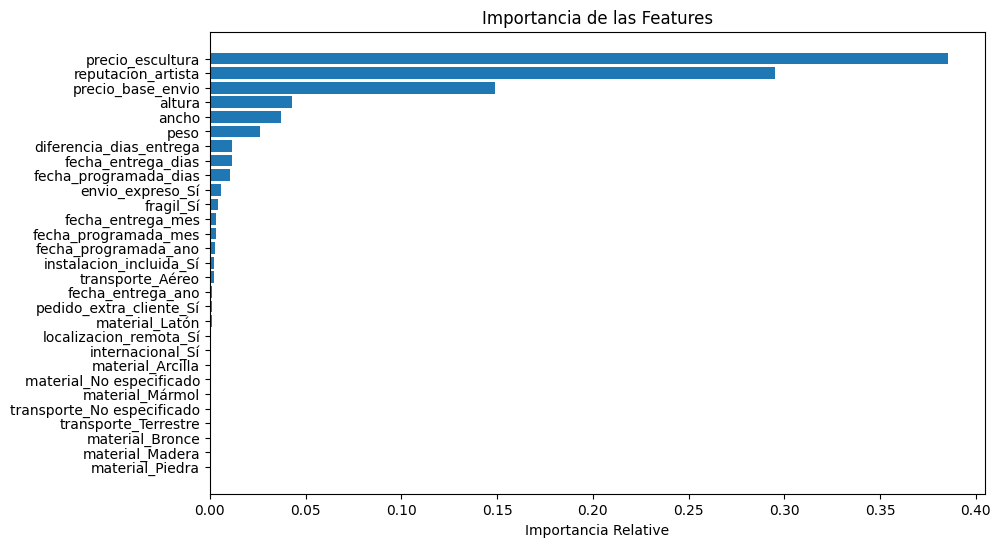

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

importancia_features = pd.DataFrame({'Feature':dtr.feature_names_in_,
                                    'Importancia':dtr.feature_importances_}).sort_values(by='Importancia',ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(importancia_features['Feature'],importancia_features['Importancia'])
plt.xlabel('Importancia Relative')
plt.title('Importancia de las Features')

plt.show()


# Clase 3 - Evitando el super ajuste con la optimización

![](https://github.com/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/blob/main/img/escultura_1.png?raw=true)

In [26]:
param_grid = {
    'max_depth':[6,8,10,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[5,10,15],
    'max_leaf_nodes':[None,100,500]
}

In [27]:
from sklearn.model_selection import GridSearchCV

grid_search_dtr = GridSearchCV(dtr,param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_search_dtr.fit(X_train,y_train)
dtr_optimizado = grid_search_dtr.best_estimator_

print(f'Mejores parámetros: ',grid_search_dtr.best_params_)

Mejores parámetros:  {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [28]:
print('Métricas conjunto de entrenamiento')
print('R²: ', r2_score(y_train, dtr_optimizado.predict(X_train)))
print('MAE: ', mean_absolute_error(y_train, dtr_optimizado.predict(X_train)))
print('RMSE: ', mean_squared_error(y_train, dtr_optimizado.predict(X_train))**0.5)

print('\n\nMétricas conjunto de prueba')
print('R²: ', r2_score(y_test, dtr_optimizado.predict(X_test)))
print('MAE: ', mean_absolute_error(y_test, dtr_optimizado.predict(X_test)))
print('RMSE: ', mean_squared_error(y_test, dtr_optimizado.predict(X_test))**0.5)

Métricas conjunto de entrenamiento
R²:  0.8709496124958277
MAE:  473.7084817751579
RMSE:  980.4175958553703


Métricas conjunto de prueba
R²:  0.7539395249935403
MAE:  586.8626071994394
RMSE:  1315.194908266438


**VAMOS A COMPARAR**

![](https://github.com/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/blob/main/img/hiperparametros_dt.png?raw=true)

In [29]:
from sklearn.model_selection import cross_validate, KFold

estrategia_cv = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(dtr_optimizado, X,y, scoring='neg_mean_squared_error', cv= estrategia_cv,
                            return_train_score=True)

In [30]:
entrenamiento_rmse = np.sqrt(-resultados['train_score'])
prueba_rmse = np.sqrt(-resultados['test_score'])

print('Entrenamiento RMSE en cada fold: ', entrenamiento_rmse)
print('Prueba RMSE en cada fold: ', prueba_rmse)
print('\nPromedio del RMSE en el entrenamiento: ', entrenamiento_rmse.mean())
print('Promedio del  RMSE en la prueba: ', prueba_rmse.mean())

Entrenamiento RMSE en cada fold:  [1061.33787095  985.34242721 1023.82861998]
Prueba RMSE en cada fold:  [1359.22520081 1469.19123426 1424.79371964]

Promedio del RMSE en el entrenamiento:  1023.5029727125925
Promedio del  RMSE en la prueba:  1417.7367182339888


# Clase 4 - Implementando un Bosque Aleatorio

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state= 45, oob_score= True)
rfr.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=45)

In [34]:
print('Métricas conjunto de entrenamiento')
print('R²: ', r2_score(y_train, rfr.predict(X_train)))
print('MAE: ', mean_absolute_error(y_train, rfr.predict(X_train)))
print('RMSE: ', mean_squared_error(y_train, rfr.predict(X_train))**0.5)

print('\n\nMétricas conjunto de prueba')
print('R²: ', r2_score(y_test, rfr.predict(X_test)))
print('MAE: ', mean_absolute_error(y_test, rfr.predict(X_test)))
print('RMSE: ', mean_squared_error(y_test, rfr.predict(X_test))**0.5)

print('Previsión OOB R²: ',rfr.oob_score_)

Métricas conjunto de entrenamiento
R²:  0.9773758519600008
MAE:  183.9172127206501
RMSE:  410.5041552539995


Métricas conjunto de prueba
R²:  0.8224788880212647
MAE:  463.52012368421055
RMSE:  1117.1055117958163
Previsión OOB R²:  0.8284340726706725


**VAMOS A COMPARAR**

![](https://github.com/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/blob/main/img/comparacion_1.png?raw=true)

In [35]:
estrategia_cv = KFold(n_splits=3, shuffle=True, random_state=45)

resultados = cross_validate(rfr, X,y, scoring='neg_mean_squared_error', cv= estrategia_cv,
                            return_train_score=True)

entrenamiento_rmse = np.sqrt(-resultados['train_score'])
prueba_rmse = np.sqrt(-resultados['test_score'])

print('\nPromedio del RMSE en el entrenamiento: ', entrenamiento_rmse.mean())
print('Promedio del  RMSE en la prueba: ', prueba_rmse.mean())


Promedio del RMSE en el entrenamiento:  427.3252336020258
Promedio del  RMSE en la prueba:  1147.4321700780329


# Clase 5 - Optimizando el Bosque Aleatorio

**VAMOS A COMPARAR**

![](https://github.com/ahcamachod/2266-regresion-construyendo-arboles-de-regresion/blob/main/img/comparacion_2.png?raw=true)